In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
os.getcwd()

'C:\\Users\\Shravya'

In [11]:
df = pd.read_excel(r'C:\Users\Shravya\titanic (2)\train.xlsx')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Shape and column names
print("Shape:", df.shape)
print("Columns:", df.columns)

# Dataset info and summary
df.info()
df.describe(include='all')

Shape: (891, 12)
Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891.0,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681.0,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082.0,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7.0,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Fill Age with median (numeric and skewed)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode (categorical)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
df.drop('Cabin', axis=1, inplace=True)

# Re-check missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

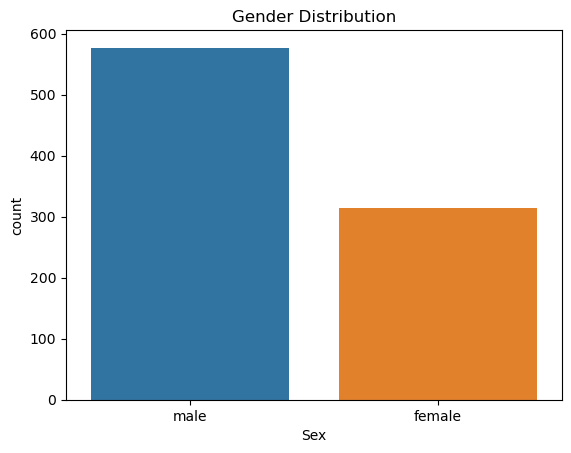

In [16]:
# Gender Distribution
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()

### Observation:
- There were more male passengers (~65%) than female passengers (~35%) on board the Titanic.

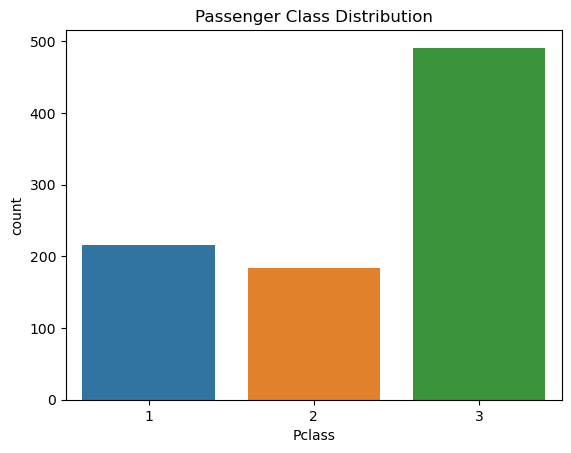

In [20]:
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()

### Observation:
- Most passengers were in 3rd class, followed by 1st and then 2nd class.
- This indicates more lower-income passengers on the Titanic.

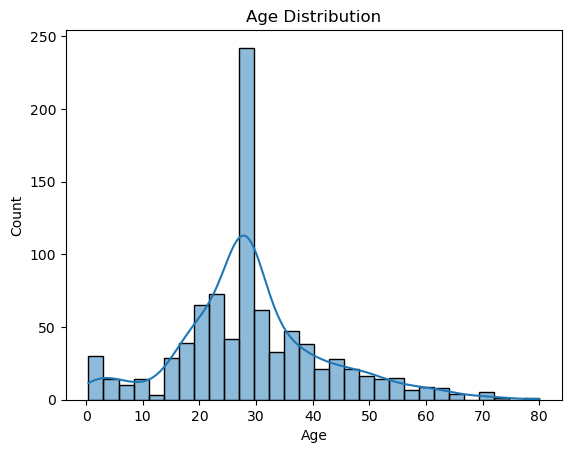

In [21]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

### Observation:
- Most passengers were aged between 20 to 40.
- There were also children and elderly passengers, but in smaller numbers.

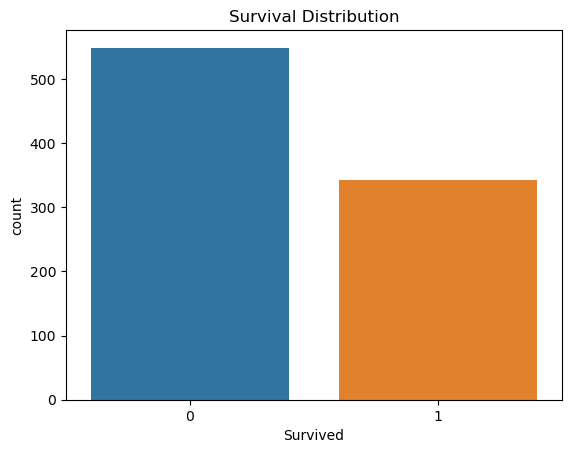

In [22]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Distribution")
plt.show()

### Observation:
- Around 38% of the passengers survived, while 62% did not.
- More people died than survived.

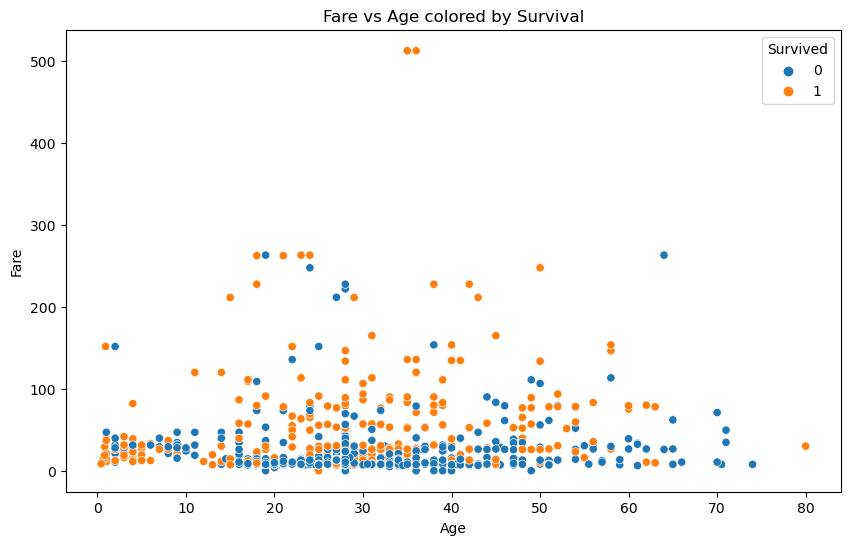

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Fare vs Age colored by Survival")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

### Observation:
- Passengers who paid higher fares had higher survival rates.
- Many low-fare passengers (likely 3rd class) did not survive.
- Younger passengers had varied survival, but more survivors appear at higher fares.

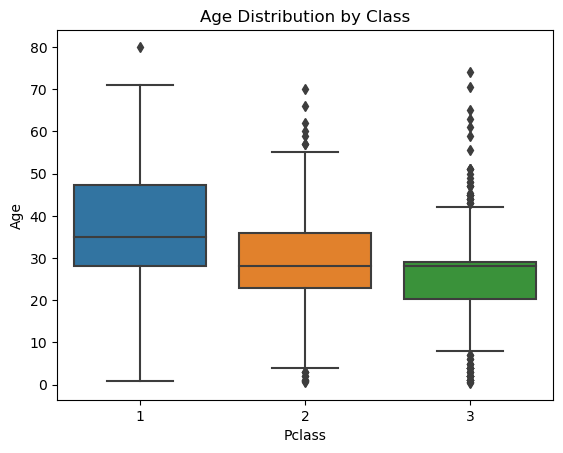

In [24]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Age Distribution by Class")
plt.show()

### Observation:
- 1st class passengers were generally older.
- 3rd class had more younger passengers and children.

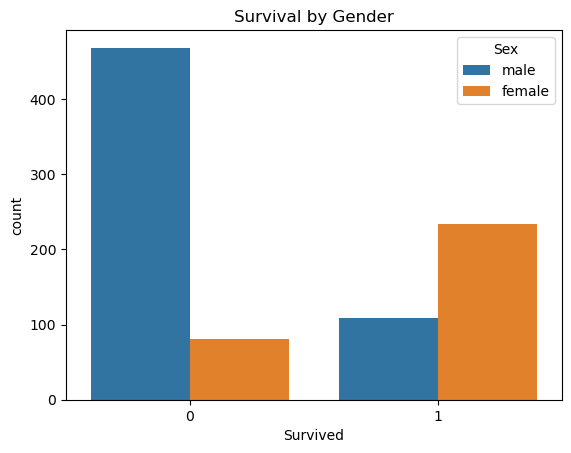

In [26]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()

### Observation:
- Most of the survivors were females.
- A large number of males did not survive.
- "Women and children first" seems to have been followed.

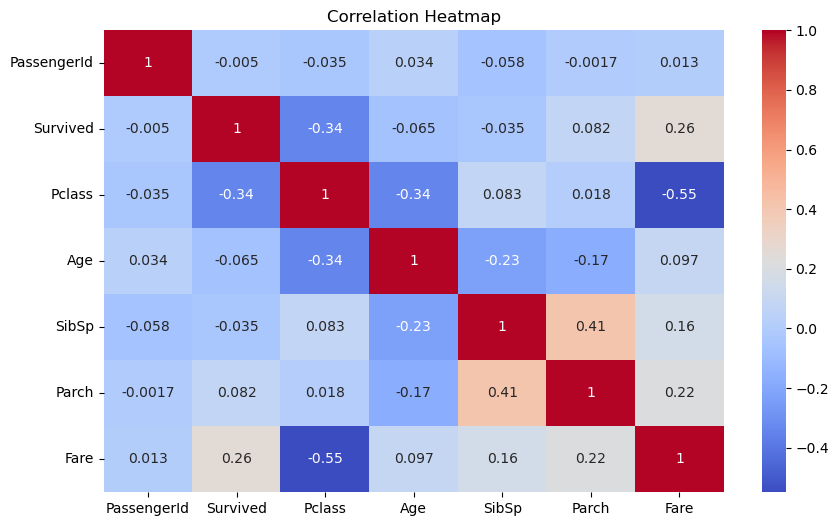

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Observation:
- Survived has a positive correlation with Fare and Pclass.
- Age and number of siblings/parents had weak or no correlation with survival.

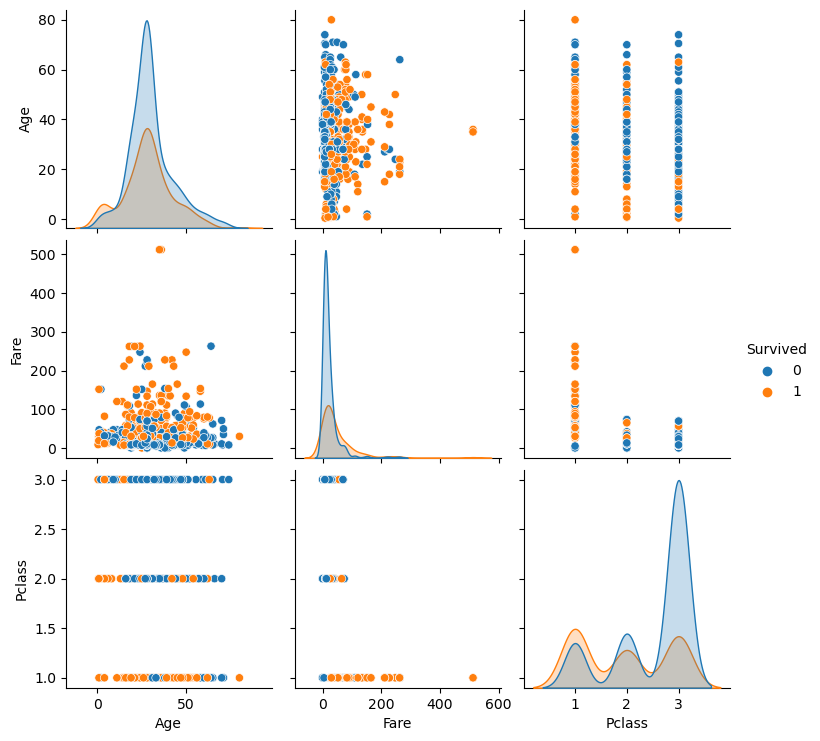

In [32]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.show()

### Observation:
- Surviving passengers generally had higher fares and were more from 1st class.
- Clusters show that 3rd class passengers had lower chances of survival.

## 📌 Final Summary:

- Females had a significantly higher survival rate than males.
- 1st class passengers were more likely to survive than those in 2nd or 3rd class.
- Passengers who paid a higher fare had better survival chances.
- Younger passengers had slightly higher survival rates.
- The dataset clearly shows the effect of gender, class, and fare on survival outcomes.
